In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
import os
os.getcwd() # Mengetahui working directory sekarang

'/Users/macair/Documents/jihad/Data Analyst/Growia/Modul 6/File Notebook Python Growia'

In [9]:
os.listdir() # Melihat daftar file di working directory sekarang

['4. For Loop.ipynb',
 '3. Conditional.ipynb',
 '.DS_Store',
 '8. Data Visualization with seaborn and matplotlib.ipynb',
 'Jihad Rafsanjani - Tugas Modul 6 Basic Python Programming.ipynb',
 'Dataset',
 '9. Practical Data Analytic - Funnel Analysis.ipynb',
 'bike_sharing_clean.csv',
 '1. Variable.ipynb',
 'Tugas python advance.ipynb',
 'Jihad Rafsanjani - Tugas Modul 6 Advance Python Programming.ipynb',
 '10. Practical Data Analytic - Customer Segmentation.ipynb',
 '11. Practical Data Analytic - RFM Analysis.ipynb',
 '2. Operasi.ipynb',
 '6.2 Common Data Structure - Dictionary & Set.ipynb',
 'Readme.txt',
 '.ipynb_checkpoints',
 '6. Common Data Structure.ipynb',
 'Environment.ipynb',
 'bike_sharing_clean1.csv',
 '7. pandas - data analysis.ipynb',
 '5. Function.ipynb']

In [155]:
#Link dataset https://www.kaggle.com/datasets/aajay20/mall-customers-datacsv

df = pd.read_csv('./Dataset/Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
245,246,Male,30,297,69
246,247,Female,56,311,14
247,248,Male,29,313,90
248,249,Female,19,316,32


# Data Cleansing

In [157]:
df.columns = ['customer_id','gender','age','annual_income','spending_score']
df.set_index('customer_id',inplace=True)
df

,gender,age,annual_income,spending_score
customer_id,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
246,Male,30,297,69
247,Female,56,311,14
248,Male,29,313,90


# Exploratory Data Analysis

In [15]:
df['gender'].value_counts()

gender
Female    137
Male      113
Name: count, dtype: int64

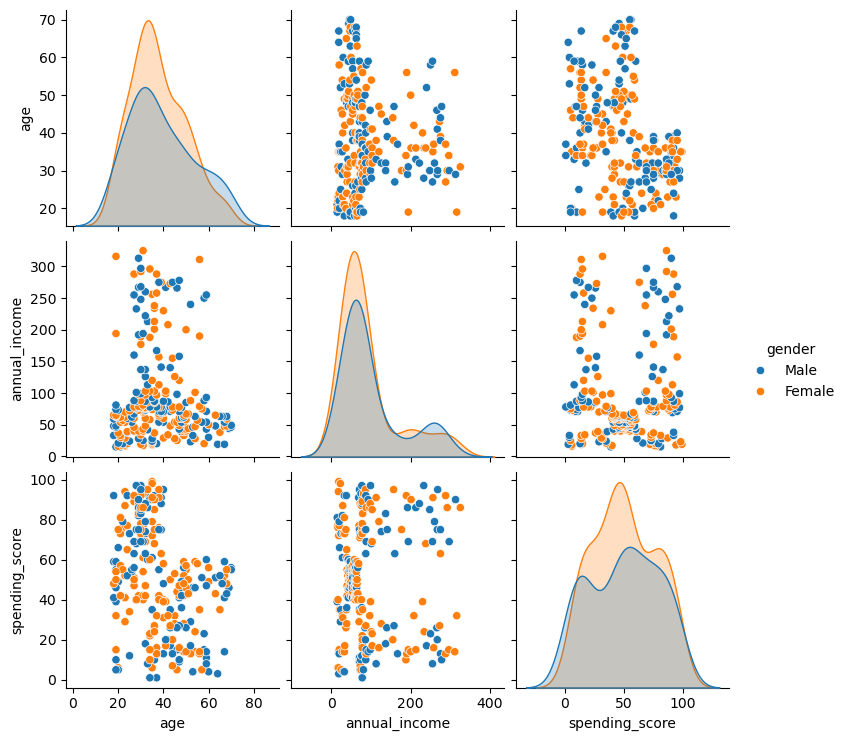

In [17]:
sns.pairplot(data = df,hue='gender')

# Algoritma K-Means

K-Means adalah algoritma pengelompokan data dengan melihat kemiripan nilai dalam suatu wilayah.  
Asumsi utama dari K-Means adalah suatu kelompok adalah sekumpulan data yang berdekatan.  
K-means memiliki 1 parameter utama yaitu K = Jumlah Kluster.  

Step melakukan K-Means di Python :
1. Lakukan standardisasi terhadap data
2. Tentukan jumlah kluster
3. Gunakan algoritma K-Means terhadap data
4. Lakukan Analisis dengan hasil kluster

# Ilustrasi cara kerja K-Means

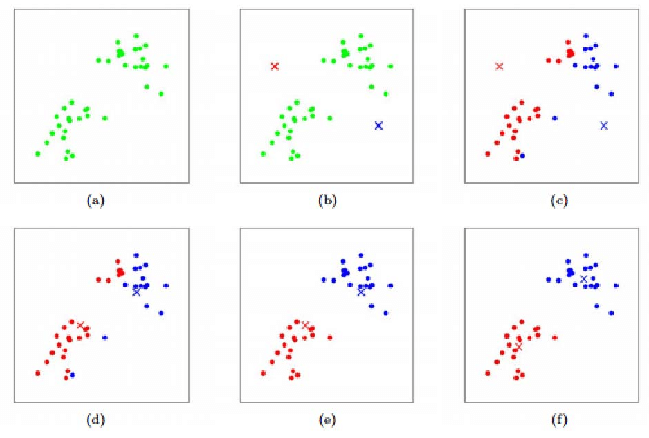

# 1. Apa itu standardisasi?

Scaling adalah transformasi agar data berada dalam suatu skala.  
Standardisasi adalah scaling agar data memiliki rataan = 0 dan variansi = 1.

Berikut rumus dari standardisasi

$$X_{baru} = \frac{X_{lama} - mean(X)}{std(X)}$$

In [19]:
from sklearn.preprocessing import StandardScaler

In [159]:
cols = ['age','annual_income','spending_score']

scaler = StandardScaler().set_output(transform="pandas")
df_scaled = scaler.fit_transform(df[cols])

In [23]:
df[cols]

,age,annual_income,spending_score
customer_id,,,
1,19,15,39
2,21,15,81
3,20,16,6
4,23,16,77
5,31,17,40
...,...,...,...
246,30,297,69
247,56,311,14
248,29,313,90


In [25]:
df_scaled

,age,annual_income,spending_score
customer_id,,,
1,-1.482970,-1.044560,-0.412847
2,-1.330808,-1.044560,1.129271
3,-1.406889,-1.031599,-1.624511
4,-1.178646,-1.031599,0.982402
5,-0.569999,-1.018638,-0.376130
...,...,...,...
246,-0.646079,2.610468,0.688666
247,1.332025,2.791923,-1.330774
248,-0.722160,2.817845,1.459724


<Axes: xlabel='age', ylabel='annual_income'>

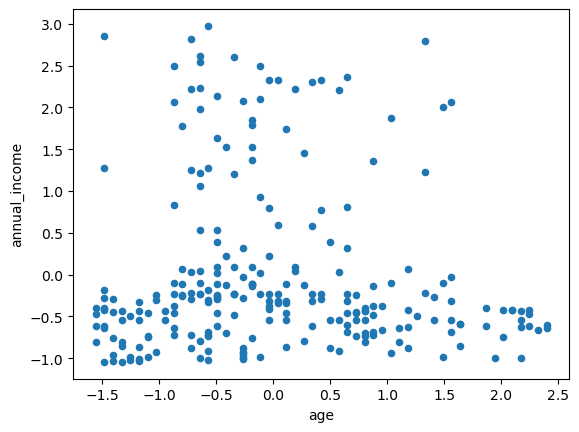

In [27]:
df_scaled.plot(x='age',y='annual_income',kind='scatter')

## Kenapa perlu di standardisasi?

K-Means adalah algoritma yang menggunakan jarak antar titik sebagai patokan.  

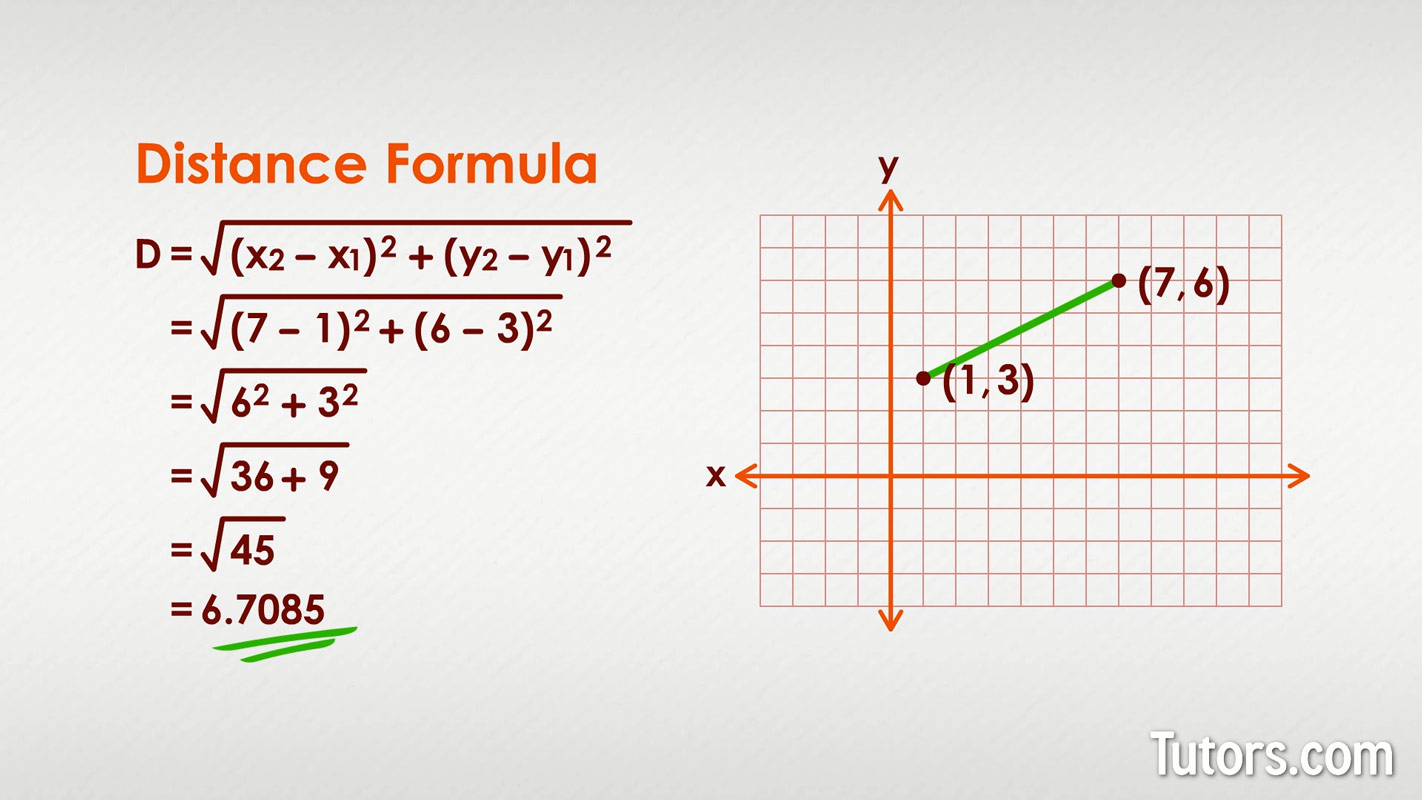

(15.4, 72.6, -500.0, 340500.0)

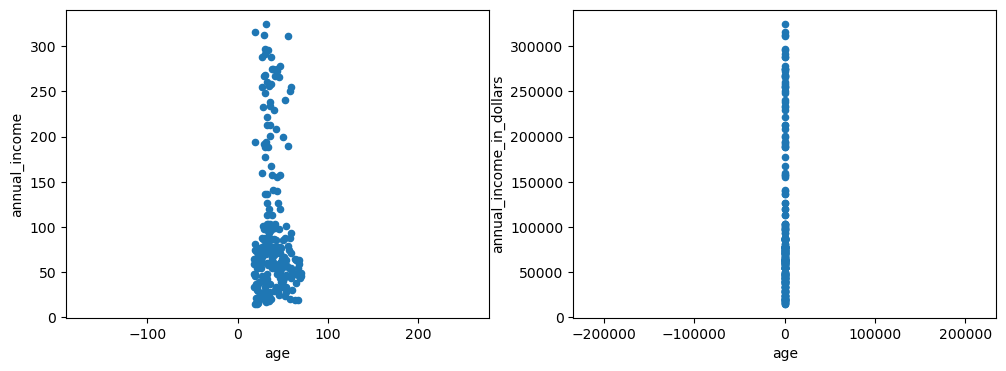

In [29]:
df['annual_income_in_dollars'] = df['annual_income']*1000

fig,ax = plt.subplots(1,2,figsize=(12,4))

df.plot(x='age',y='annual_income',kind='scatter',ax=ax[0])
ax[0].axis('equal')

df.plot(x='age',y='annual_income_in_dollars',kind='scatter',ax=ax[1])
ax[1].axis('equal')

## Contoh kasus kenapa harus standardisasi :
Pasangan A : 
- Umur 35 dan Penghasilan 100k
- Umur 70 dan Penghasilan 100k

atau
Pasangan B:
- Umur 35 dan Penghasilan 100k
- Umur 35 dan Penghasilan 101k

Pasangan A, jarak 2D nya adalah 35
Pasangan B, jarak 2D nya adalah 1000

Berdasarkan jaraknya, pasangan B 28.5 lebih jauh daripada pasangan A

# 2. Lakukan K-Means

dokumentasi : https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [161]:
from sklearn.cluster import KMeans
model= KMeans(n_clusters = 5,n_init='auto')
model.fit(df_scaled)

KMeans(n_clusters=5)

In [33]:
model.labels_

array([0, 0, 2, 0, 2, 0, 2, 0, 1, 0, 1, 0, 1, 0, 2, 0, 2, 0, 1, 0, 2, 0,
       2, 0, 1, 0, 2, 0, 2, 0, 1, 0, 1, 0, 1, 0, 2, 0, 2, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 2, 2, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 2, 1, 1, 1, 1, 1, 0, 1, 2, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 2, 2, 0, 1, 0, 1, 0, 2, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 2, 0, 0, 0, 1, 1, 1, 1, 0, 2, 0, 0, 2, 0, 2, 0, 1, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0,
       1, 0, 1, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 4, 3, 4, 0, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3], dtype=int32)

In [163]:
df['cluster'] = model.labels_

In [165]:
df

,gender,age,annual_income,spending_score,cluster
customer_id,,,,,
1,Male,19,15,39,2
2,Male,21,15,81,2
3,Female,20,16,6,4
4,Female,23,16,77,2
5,Female,31,17,40,4
...,...,...,...,...,...
246,Male,30,297,69,1
247,Female,56,311,14,0
248,Male,29,313,90,1


# 3. Analisis data hasil cluster

In [53]:
df.dtypes

gender                      object
age                          int64
annual_income                int64
spending_score               int64
annual_income_in_dollars     int64
cluster                      int32
dtype: object

In [59]:
df_agg = df[['age', 'annual_income','spending_score','annual_income_in_dollars', 'cluster']]

In [169]:
df_agg.groupby(['cluster']).mean()

,age,annual_income,spending_score,annual_income_in_dollars
cluster,,,,
0,56.468085,52.851064,47.893617,52851.063830
1,30.742424,68.893939,80.151515,68893.939394
2,43.260870,234.521739,18.434783,234521.739130
3,25.046512,52.930233,43.395349,52930.232558
4,30.913043,251.913043,79.913043,251913.043478
5,44.937500,70.895833,18.583333,70895.833333


# 4. Bagaimana jika ragu menentukan cluster?
1. Dengan bisnis : Ada berapa banyak kluster yang bisa diberikan perlakuan khusus oleh stakeholder? Apakah ada target?
2. Dengan statistik : Jumlah kluster yang dipilih adalah cluster yang optimal. Titik yang mirip berada di 1 kluster dan yang tidak mirip berada di kluster yang berbeda.

# Elbow Method

Ide dari Elbow Method :
Fokus terhadap jarak anggota kluster ke pusat kluster (SSD = Sum Square Distance).

Misal M adalah titik cluster paling ideal.  
Maka jika kita membuat clustering Kmeans dengan M+1 kluster, SSD nya tidak bertambah baik.

Yang dicari :  
Jumlah kluster sehingga SSD tidak bertambah baik (minim improvement)

In [67]:
list_sum_distance = []
for k in range(2,10):
    model= KMeans(n_clusters = k,n_init='auto')
    model.fit(df_scaled)
    inertia = model.inertia_ 
    list_sum_distance.append(inertia)

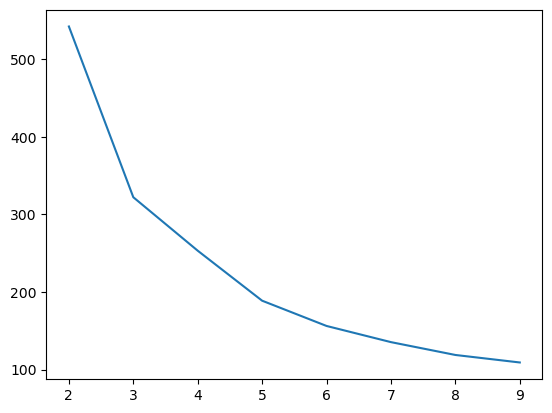

In [69]:
plt.plot(range(2,10),list_sum_distance)

# Silhouette Score

Ide dari Silhouette Method :
Fokus terhadap jarak antar titik dalam suatu kluster dan jarak antar titik dalam kluster yang berbeda.

Segmentasi paling ideal adalah ketika jarak anggota dalam kluster seminimum mungkin dan jarak antar kluster yang berbeda semaksimum mungkin

dokumentasi : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

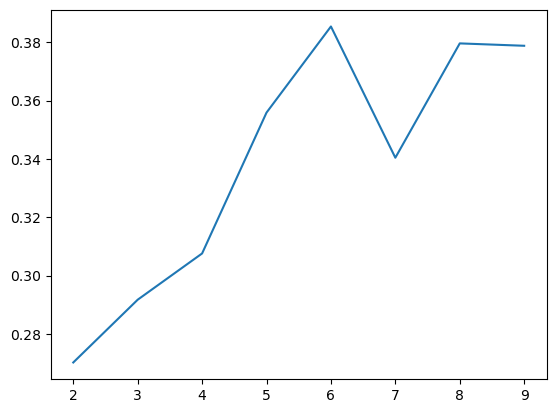

In [111]:
from sklearn.metrics import silhouette_score
list_silhouette = []
for k in range(2,10):
    model= KMeans(n_clusters = k,n_init='auto')
    model.fit(df_scaled)
    cluster = model.labels_
    score = silhouette_score(df_scaled,cluster)
    list_silhouette.append(score)
plt.plot(range(2,10),list_silhouette)

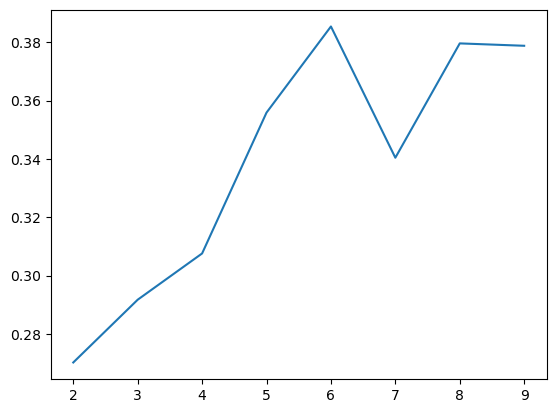

In [113]:
plt.plot(range(2,10),list_silhouette)

Dari kedua metode, k = 6 adalah yang paling ideal secara data.

Kita jalankan ulang algoritma K-means dengan k =6

In [77]:
from sklearn.cluster import KMeans
model= KMeans(n_clusters = 6,n_init='auto')
model.fit(df_scaled)

df['cluster'] = model.labels_
df_agg = df[['age', 'annual_income','spending_score','annual_income_in_dollars', 'cluster']]
display(df_agg.groupby(['cluster']).mean())
display(df_agg['cluster'].value_counts())

,age,annual_income,spending_score,annual_income_in_dollars
cluster,,,,
0,56.468085,52.851064,47.893617,52851.063830
1,30.742424,68.893939,80.151515,68893.939394
2,43.260870,234.521739,18.434783,234521.739130
3,25.046512,52.930233,43.395349,52930.232558
4,30.913043,251.913043,79.913043,251913.043478
5,44.937500,70.895833,18.583333,70895.833333


cluster
1    66
5    48
0    47
3    43
2    23
4    23
Name: count, dtype: int64

# Challenge

Kita dapat melakukan k-means dengan data bersifat categorical.  
Lakukan tahap-tahap berikut :  

In [81]:
# Mulai dengan data ini
df = pd.read_csv('./Dataset/Mall_Customers.csv')
df.columns = ['customer_id','gender','age','annual_income','spending_score']
df.set_index('customer_id',inplace=True)
df

,gender,age,annual_income,spending_score
customer_id,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
246,Male,30,297,69
247,Female,56,311,14
248,Male,29,313,90


In [85]:
# 1. Ubah variabel gender menjadi 0 untuk pria dan 1 untuk wanita. Proses ini disebut sebagai one-hot encoding
df['gender'] = df['gender'].map({'Male':0, 'Female' :1})

In [87]:
df

,gender,age,annual_income,spending_score
customer_id,,,,
1,0,19,15,39
2,0,21,15,81
3,1,20,16,6
4,1,23,16,77
5,1,31,17,40
...,...,...,...,...
246,0,30,297,69
247,1,56,311,14
248,0,29,313,90


In [89]:
# 2. Lakukan standard scaling untuk terhadap variabel gender + variabel lainnya
cols = ['gender','age','annual_income','spending_score']
scaler = StandardScaler().set_output(transform="pandas")
df_scaled = scaler.fit_transform(df[cols])

In [93]:
df[cols]

,gender,age,annual_income,spending_score
customer_id,,,,
1,0,19,15,39
2,0,21,15,81
3,1,20,16,6
4,1,23,16,77
5,1,31,17,40
...,...,...,...,...
246,0,30,297,69
247,1,56,311,14
248,0,29,313,90


In [95]:
df_scaled

,gender,age,annual_income,spending_score
customer_id,,,,
1,-1.101086,-1.482970,-1.044560,-0.412847
2,-1.101086,-1.330808,-1.044560,1.129271
3,0.908195,-1.406889,-1.031599,-1.624511
4,0.908195,-1.178646,-1.031599,0.982402
5,0.908195,-0.569999,-1.018638,-0.376130
...,...,...,...,...
246,-1.101086,-0.646079,2.610468,0.688666
247,0.908195,1.332025,2.791923,-1.330774
248,-1.101086,-0.722160,2.817845,1.459724


<Axes: xlabel='age', ylabel='annual_income'>

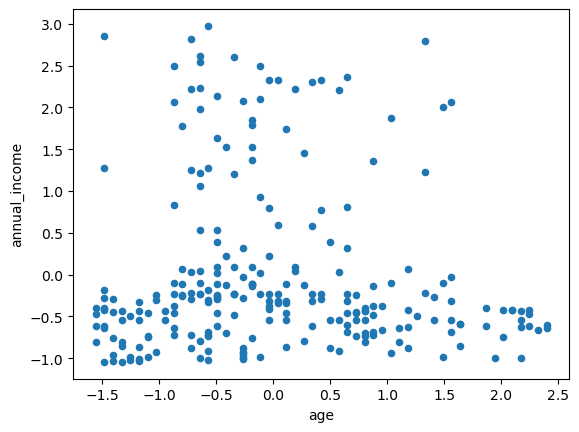

In [139]:
df_scaled.plot(x='age',y='annual_income',kind='scatter')

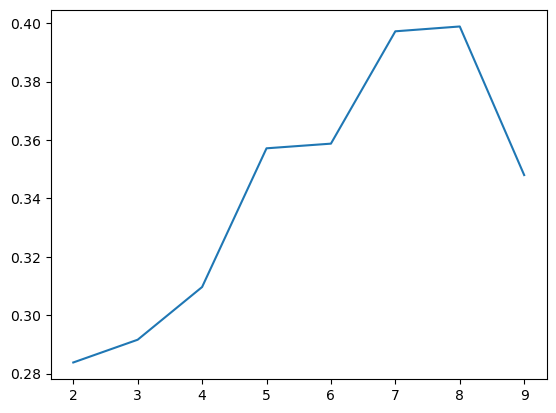

In [141]:
# 3. Lakukan perhitungan K-Means dan Silhouette Method untuk mencari kluster terbaik 
from sklearn.metrics import silhouette_score
list_silhouette = []
for k in range(2,10):
    model= KMeans(n_clusters = k,n_init='auto')
    model.fit(df_scaled)
    cluster = model.labels_
    score = silhouette_score(df_scaled,cluster)
    list_silhouette.append(score)
plt.plot(range(2,10),list_silhouette)

#Kenapa plot nya berubah2 saat code ini di running?

In [143]:
from sklearn.cluster import KMeans
model= KMeans(n_clusters = 8,n_init='auto')
model.fit(df_scaled)

KMeans()

In [145]:
df['cluster'] = model.labels_

In [147]:
df

,gender,age,annual_income,spending_score,cluster
customer_id,,,,,
1,0,19,15,39,5
2,0,21,15,81,5
3,1,20,16,6,2
4,1,23,16,77,7
5,1,31,17,40,2
...,...,...,...,...,...
246,0,30,297,69,4
247,1,56,311,14,0
248,0,29,313,90,4


In [137]:
# 4. Lakukan analisis sederhana terhadap hasil kluster. Apakah muncul kluster berdasarkan jenis kelamin?

In [151]:
df.groupby(['cluster']).mean()

,gender,age,annual_income,spending_score
cluster,,,,
0,0.681818,42.272727,244.772727,18.909091
1,0.000000,58.166667,53.633333,37.566667
2,1.000000,29.628571,55.342857,40.742857
3,1.000000,51.697674,59.488372,36.813953
4,0.350000,31.600000,255.600000,81.950000
5,0.000000,28.744186,65.930233,71.000000
6,0.000000,35.750000,89.900000,14.650000
7,1.000000,29.864865,72.000000,81.729730
